In [113]:
from glob import glob
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer
import itertools
import re
import os
import string
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from IPython.display import Image
from math import ceil
import seaborn as sns
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings(action="ignore")

In [117]:
import os
import random
import re
import nltk
import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest , f_classif
from tqdm import tqdm as t
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.corpus import stopwords

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
import eli5
from scipy.sparse import hstack, vstack

from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import textblob
import string

In [116]:
print(os.listdir('C:/Users/Neha Maiya/reviews/aclImdb'))#link4

['aclImdb', 'imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']


In [65]:
PATH = 'C:/Users/Neha Maiya/reviews/aclImdb' #link4

In [66]:
import sys
sys.getdefaultencoding()

'utf-8'

In [67]:

posFiles = [x for x in os.listdir(PATH+"/train/pos/") if x.endswith(".txt")]
negFiles = [x for x in os.listdir(PATH+"/train/neg/") if x.endswith(".txt")]#link 8

# testFiles = [x for x in os.listdir(PATH+"test/") if x.endswith(".txt")]

In [68]:
test_pos_Files= [x for x in os.listdir(PATH+"/test/pos/") if x.endswith(".txt")]
test_neg_Files=[x for x in os.listdir(PATH+"/test/neg/") if x.endswith(".txt")]  #link 8

In [69]:
P_train=[]
N_train=[]

for nfile in negFiles:
    with open(PATH+"/train/neg/"+nfile, encoding="utf-8") as f:
        N_train.append(f.read())
for pfile in posFiles:
    with open(PATH+"/train/pos/"+pfile, encoding="utf-8") as f:
        P_train.append(f.read())
        #link 8


In [70]:
P_test=[]
N_test=[]
for ptestfile in test_pos_Files:
    with open(PATH+"/test/pos/"+ptestfile, encoding="utf-8") as f:
        P_test.append(f.read())
for ntestfile in test_neg_Files:
    with open(PATH+"/test/neg/"+ntestfile, encoding="utf-8") as f:
        N_test.append(f.read())
        #link 8

In [71]:
# change_names = reviews_train.columns.tolist()
# change_names[change_names.index('label')] = 'Sentiment'
# reviews_train.columns = change_names
# reviews_train.head()

In [72]:
reviews_train = pd.concat([
    pd.DataFrame({"review":P_train, "Label":1, "file":posFiles}),
    pd.DataFrame({"review":N_train, "Label":-1, "file":negFiles})
], ignore_index=True).sample(frac=1, random_state=1)
reviews_train.head()


,review,Label,file
21492,"I have copy of this on VHS, I think they (The ...",-1,6844_1.txt
9488,After several extremely well ratings to the po...,1,7290_10.txt
16933,I still don't know why I forced myself to sit ...,-1,2740_1.txt
12604,Mt little sister and I are self-proclaimed hor...,-1,10094_1.txt
8222,I have personally seen many Disney movies in m...,1,6150_7.txt


In [73]:
# change_names_test = reviews_test.columns.tolist()
# change_names_test[change_names_test.index('Sentiment')] = 'Sentiment_Test'
# reviews_test.columns = change_names_test

In [74]:
    reviews_test = pd.concat([
    pd.DataFrame({"review":P_test, "Label":2, "file":test_pos_Files}),
    pd.DataFrame({"review":N_test, "Label":-2,"file":test_neg_Files})
], ignore_index=True).sample(frac=1, random_state=1)
reviews_test.head()

,review,Label,file
21492,A movie theater with a bad history of past gru...,-2,6844_2.txt
9488,"""Here On Earth"" is a surprising beautiful roma...",2,7290_10.txt
16933,I just watched Descent. Gawds what an awful mo...,-2,2740_3.txt
12604,In a nutshell the movie is about a gang war in...,-2,10094_4.txt
8222,"Instead of watching the recycled history of ""P...",2,6150_7.txt


In [75]:
reviews_test.head(10)

,review,Label,file
21492,A movie theater with a bad history of past gru...,-2,6844_2.txt
9488,"""Here On Earth"" is a surprising beautiful roma...",2,7290_10.txt
16933,I just watched Descent. Gawds what an awful mo...,-2,2740_3.txt
12604,In a nutshell the movie is about a gang war in...,-2,10094_4.txt
8222,"Instead of watching the recycled history of ""P...",2,6150_7.txt
9110,"This is an incredibly compelling story, told w...",2,6950_10.txt
21196,"I like underdogs. So, 12 years after having fi...",-2,6578_4.txt
17193,"Okay, so I'm Singaporean and I would like to s...",-2,2975_2.txt
23846,**** MILD SPOILERS _ BUT YOU PROBABLY KNOW THE...,-2,8963_4.txt
10415,Bedrooms and Hallways gives its audience a loo...,2,8124_8.txt


In [76]:
reviews_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 21492 to 235
Data columns (total 3 columns):
review    25000 non-null object
Label     25000 non-null int64
file      25000 non-null object
dtypes: int64(1), object(2)
memory usage: 781.2+ KB


In [77]:
reviews_train.describe()

,Label
count,25000.00000
mean,0.00000
std,1.00002
min,-1.00000
25%,-1.00000
50%,0.00000
75%,1.00000
max,1.00000


In [78]:
reviews_train.shape

(25000, 3)

In [79]:
reviews_train['Label'].unique()

array([-1,  1], dtype=int64)

In [81]:
reviews_train['Label'].value_counts()

-1    12500
 1    12500
Name: Label, dtype: int64

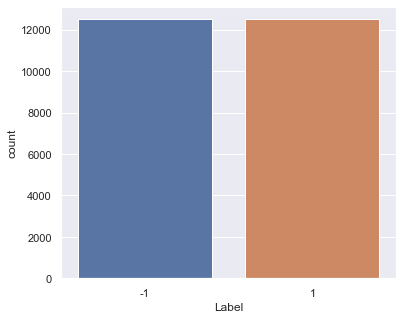

In [82]:
sns.set(rc={'figure.figsize':(6,5)})
sns.countplot(reviews_train['Label'])

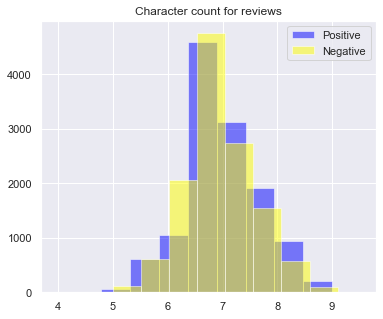

In [83]:
#character count link 4
reviews_train[reviews_train['Label']==1]['review'].apply(lambda y: np.log1p(len(y))).hist(alpha=0.5, color='blue', label='Positive')
reviews_train[reviews_train['Label']==-1]['review'].apply(lambda y: np.log1p(len(y))).hist(alpha=0.5, color='yellow', label='Negative')
plt.title('Character count for reviews')
plt.legend();
# alpha is for the darkness of color

In [84]:
reviews_test.shape

(25000, 3)

In [85]:
reviews_test['Label'].unique()

array([-2,  2], dtype=int64)

In [86]:
from bs4 import BeautifulSoup
# dataset.review = dataset.review.apply(lambda r: BeautifulSoup(r, 'html.parser').get_text())

In [87]:
import spacy
import en_core_web_sm
from spacy.lang.en import English
en_core_web_sm.load()
from  spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords
import string

In [88]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline


import html as ihtml
import re

In [89]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

In [90]:
stopWords = stopwords.words('english')

In [91]:
#stemmer = PorterStemmer()

In [92]:
snowballstemmer = SnowballStemmer('english')

In [93]:
lemmatizer = WordNetLemmatizer()


In [94]:
reviews_train.iloc[1]

review    After several extremely well ratings to the po...
Label                                                     1
file                                            7290_10.txt
Name: 9488, dtype: object

In [95]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_punctuation
from gensim.parsing.preprocessing import strip_tags
from gensim.parsing.preprocessing import strip_multiple_whitespaces

In [96]:
def rmvhtmltags(text):
    remreg = re.compile('<.*?>')
    cleartext = re.sub(remreg, '', text)
    return text
# Function to remove URLs starting with https/http 
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

def rmvspclcharacter(text):

    #convert to lowercase and ignore special charcter
    clearspcl = re.sub(r'[^A-Za-z0-9\s.]', r'', str(text).lower())
    clearspcl = re.sub(r'\n', r' ', text)
    
    
    clearspcl = " ".join([word for word in text.split() if word not in stopWords])
    
#     clearspcl


#     print(' '.join(stemming_texts))
    return text
def stemming_text(text):
    stemmed_words = [snowballstemmer.stem(word) for word in text.split()]
    return('  '.join(stemmed_words))
    
#lemmantize
def lemmatize_words(text):
    lemmatized_words = [lemmatizer.lemmatize(word, 'v') for word in text.split()]
    return('  '.join(lemmatized_words))

In [97]:
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist
    

In [98]:

def dataprocessing(x):
    x = rmvhtmltags(x)
    x = remove_urls(x)

    x = x.lower()
    x = rmvspclcharacter(x)
#     
    x = remove_stopwords(x)
    x = strip_punctuation(x)
    x = strip_multiple_whitespaces(x)
    x = stemming_text(x)
    #x = lemmatize_words(x)
    x=' '.join([re.sub(r'\d+', '',i) for i in word_tokenize(x)])
#     x = stemming(x)
#    x = ' '.join(unique_list(x.split()))
    return x

In [99]:
reviews_train['review'] = reviews_train['review'].map(lambda x: dataprocessing(x))

In [100]:
reviews_train['review'][7]

'critic acclaim psycholog thriller base true event gabriel robin william celebr writer late night talk host captiv harrow stori young listen adopt mother toni collett troubl question aris boy s stori howev gabriel find drawn widen mysteri hide dead secret accord film s offici synopsi br br you stop read comment watch film now br br the how lose leg end ms collett plan new life chop off sent delet scene land it s overkil true natur physic mental ailment obvious time mr william return new york possibl blind question revel certain highway video tape scene film benefit re edit director s cut br br william bobbi cannaval as jess don t seem initi believ coupl scene establish relationship help set stage otherwis cast exemplari william offer except strong character gay imperson sandra oh as anna joe morton as ash rori culkin pete logand perfect br br best all collett s donna belong creepi hall fame ms oh correct say collett be you know like guy psycho year organ give act award reach women slig

In [101]:
# reviews_train['review'] = reviews_train['review'].map(lambda x: stemming_text(x))

In [102]:
vectorizer = CountVectorizer()
countvect = vectorizer.fit_transform(reviews_train['review'])
countvect = countvect.tocsc()  
countl = (reviews_train['Label'] == 1).values.astype(np.int)


In [103]:
countvect

<25000x49412 sparse matrix of type '<class 'numpy.int64'>'
	with 2283538 stored elements in Compressed Sparse Column format>

In [104]:
reviews_train['Label']

21492   -1
9488     1
16933   -1
12604   -1
8222     1
        ..
10955    1
17289   -1
5192     1
12172    1
235      1
Name: Label, Length: 25000, dtype: int64

In [105]:
review_c = reviews_train

In [106]:
print(countvect,countl)

  (9042, 0)	1
  (10021, 0)	1
  (13626, 0)	1
  (14396, 0)	1
  (21186, 0)	1
  (1222, 1)	1
  (7419, 1)	4
  (9042, 1)	1
  (18775, 1)	1
  (21050, 1)	1
  (24959, 1)	1
  (5940, 2)	1
  (20169, 3)	1
  (241, 4)	1
  (8459, 5)	1
  (331, 6)	1
  (6602, 7)	1
  (20169, 8)	1
  (3748, 9)	1
  (14536, 9)	1
  (18929, 9)	1
  (23454, 9)	1
  (17572, 10)	1
  (3110, 11)	1
  (3588, 12)	1
  :	:
  (20070, 49398)	1
  (7387, 49399)	1
  (17707, 49399)	1
  (24442, 49400)	1
  (2073, 49401)	1
  (3193, 49401)	1
  (9210, 49401)	1
  (13301, 49401)	1
  (22011, 49401)	1
  (22630, 49401)	1
  (18648, 49402)	2
  (20500, 49402)	1
  (4137, 49403)	2
  (4454, 49403)	1
  (10411, 49404)	1
  (9124, 49405)	1
  (22204, 49406)	1
  (10233, 49407)	1
  (410, 49408)	1
  (21691, 49409)	1
  (1600, 49410)	1
  (14884, 49410)	1
  (18699, 49410)	1
  (20279, 49410)	1
  (7074, 49411)	1 [0 1 0 ... 1 1 1]


In [107]:
vectorizer.get_feature_names()


['aa',
 'aaa',
 'aaaaaaah',
 'aaaaah',
 'aaaaatch',
 'aaaahhhhhhh',
 'aaaand',
 'aaaarrgh',
 'aaah',
 'aaargh',
 'aaaugh',
 'aaawwwwnnn',
 'aachen',
 'aada',
 'aadha',
 'aag',
 'aaghh',
 'aah',
 'aahhh',
 'aaip',
 'aaja',
 'aakash',
 'aaker',
 'aakrosh',
 'aaliyah',
 'aam',
 'aamir',
 'aan',
 'aankh',
 'aankhen',
 'aap',
 'aapk',
 'aapkey',
 'aardman',
 'aardvark',
 'aargh',
 'aaron',
 'aarp',
 'aarrrgh',
 'aatish',
 'aauugghh',
 'aavjo',
 'aaww',
 'ab',
 'aba',
 'aback',
 'abadi',
 'abahi',
 'abanaz',
 'abandon',
 'abank',
 'abash',
 'abashidz',
 'abat',
 'abattoir',
 'abba',
 'abbad',
 'abbasi',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abbrevi',
 'abbu',
 'abc',
 'abcd',
 'abdic',
 'abdomen',
 'abdomin',
 'abdu',
 'abduct',
 'abducte',
 'abductor',
 'abdul',
 'abdullah',
 'abe',
 'abel',
 'abercrombi',
 'abernathi',
 'aberr',
 'aberystwyth',
 'abet',
 'abey',
 'abgail',
 'abhay',
 'abhi',
 'abhijeet',
 'abhimaan',
 'abhisheh',
 'abhishek',
 'abhor',
 'abhorr',
 'abi',
 'abid',
 'abi

In [108]:
y_train_label = reviews_train['Label'].tolist()
x_train_review = reviews_train['review'].tolist()

y_test_label = reviews_test['Label'].tolist()
x_test_review = reviews_test['review'].tolist()

In [109]:
# # bag of words tfidf 
# #It converts text to word frequency vectors
# #word-level

# tfidfvec = TfidfVectorizer(token_pattern=r'\w{1,}', max_features=1000, stop_words='english')
# tfidfvec.fit(x_train_review)
# xtrain_review_tfidf =  tfidfvec.transform(x_train_review)


In [110]:
print(xtrain_review_tfidf)

NameError: name 'xtrain_review_tfidf' is not defined

In [ ]:
# #n-gram
# tfidf_ngram = TfidfVectorizer(token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=1000, stop_words='english')
# xtrain_rev_ngram =  tfidf_ngram.fit_transform(x_train_review)


In [ ]:
# # split the data set into a training and test set using countvectorizer

# X_train, X_test, y_train, y_test = train_test_split(countvect, countl, test_size=0.3, random_state = 42)

In [ ]:
# #naive bayes  count vector as split of test and training

# from sklearn.naive_bayes import MultinomialNB
# Multiclassifier = MultinomialNB()
# Multiclassifier.fit(X_train, y_train)
# y_pred = Multiclassifier.predict(X_test)

# # .3f gives us 3 decimal points
# print('Accuracy Score on Training data: {0:.3f}'.format(Multiclassifier.score(X_train, y_train)))
# print('Accuracy Score on Testing data: {0:.3f}'.format(Multiclassifier.score(X_test, y_test)))

In [ ]:
# y_train_label[:5]

In [111]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_train_review, y_train_label, test_size=0.3, random_state = 42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train2)
testing_data = count_vector.transform(X_test2)

# Instantiate our model
naive_bayes = MultinomialNB()

# Fit our model to the training data
naive_bayes.fit(training_data, y_train2)

# Predict on the test data
predictions = naive_bayes.predict(testing_data)

# Score our model

print('Accuracy score: ', format(accuracy_score(y_test2, predictions)))
print('Precision score: ', format(precision_score(y_test2, predictions)))
print('Recall score: ', format(recall_score(y_test2, predictions)))
print('F1 score: ', format(f1_score(y_test2, predictions)))

In [ ]:
#ngram - bgram naive bayes
bigram_naive_bayes = make_pipeline(
    CountVectorizer(
        stop_words='english',
        binary=True,
        ngram_range=(1, 2)
    ),
    MultinomialNB()
)

bigram_naive_bayes.fit(X_train2, y_train2)

print(f'Accuracy: {bigram_naive_bayes.score(X_test2, y_test2)} \n')
print(classification_report(y_test2, bigram_naive_bayes.predict(X_test2)))

In [ ]:
#ngram - bgram naive bayes with tfidf
nb_bigram_tfidf = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 2)),
    MultinomialNB()
)

nb_bigram_tfidf.fit(X_train2, y_train2)

print(f'Accuracy: {nb_bigram_tfidf.score(X_test2, y_test2)} \n')
print(classification_report(y_test2, nb_bigram_tfidf.predict(X_test2)))

In [ ]:
#ngram - logistic regression with bigram
LogRegbigram = make_pipeline(
    CountVectorizer(
        stop_words='english',
        ngram_range=(1,2)
    ),
    LogReg()
)

LogRegbigram.fit(X_train2, y_train2)

print(f'Accuracy: {LogRegbigram.score(X_test2, y_test2)} \n')
print(classification_report(y_test2, LogRegbigram.predict(X_test2)))

In [ ]:
#ngram - logistic regression with tfidf and bigram
bigram_tfidf_logistic_regression = make_pipeline(
    CountVectorizer(
        stop_words='english',
        ngram_range=(1,2)
    ),
    TfidfTransformer(),
    LogReg()
)

bigram_tfidf_logistic_regression.fit(X_train2, y_train2)

print(f'Accuracy: {bigram_tfidf_logistic_regression.score(X_test2, y_test2)} \n')
print(classification_report(y_test2, bigram_tfidf_logistic_regression.predict(X_test2)))

In [ ]:
#svm bigram
bigram_svm = make_pipeline(
    CountVectorizer(
        stop_words='english',
        binary=True,
        ngram_range=(1, 2)
    ),
    SGDClassifier()
)

bigram_svm.fit(X_train2, y_train2)

print(f'Accuracy: {bigram_svm.score(X_test2, y_test2)} \n')
print(classification_report(y_test2, bigram_svm.predict(X_test2)))

In [ ]:
#svm bigram with tfidf
bigram_svm_tfidf = make_pipeline(
    TfidfVectorizer(),
    SGDClassifier()
)

bigram_svm_tfidf.fit(X_train2, y_train2)

print(f'Accuracy: {bigram_svm_tfidf.score(X_test2, y_test2)} \n')
print(classification_report(y_test2, bigram_svm_tfidf.predict(X_test2)))

In [ ]:

def model_training(training_model,vectorizer_2n):
    if training_model == 'LR':
        
        if vectorizer_2n == 'BOW':
            print ("Training Logistic regression model using bag of words")
            model_LR_BOW = Pipeline([('vect', CountVectorizer()),
                     ('clf', LogReg()),])
            return model_LR_BOW
           
        elif vectorizer_2n == 'TFIDF':
            print ("Training Logistic regression model using TFIDF")
            model_LR_TFIDF = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogReg()),])
            return model_LR_TFIDF
    
    elif training_model == 'SVM':
        print ("Training SVM model using bag of words")
        if vectorizer_2n == 'BOW':
            model_SVM_BOW = Pipeline([('vect', CountVectorizer()),
                     ('clf', SGDClassifier()),])
            return model_SVM_BOW
                        
        elif vectorizer_2n == 'TFIDF':
            print ("Training SVM model using TFIDF")
            model_SVM_TFIDF = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier()),])
            return model_SVM_TFIDF
    
    elif training_model == 'RF':
        
        if vectorizer_2n == 'BOW':
            print ("Training RF model using bag of words")
            model_SVM_BOW = Pipeline([('vect', CountVectorizer()),
                     ('clf', RandomForestClassifer()),])
            return model_SVM_BOW
                        
        elif vectorizer_2n == 'TFIDF':
            print ("Training RF model using TFIDF")
            model_SVM_TFIDF = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifer()),])
            return model_SVM_TFIDF

In [ ]:

from sklearn.pipeline import Pipeline
def model_fitting_in_different_dataset():
    training_model = ['LR','SVM', 'NB', 'RF']
    vectorizer_2n = ['BOW','TFIDF']
    for i in training_model:
        for j in vectorizer_2n:
            print (i, "and",j)
            fit_model3 = model_training(i,j).fit(X_train2, y_train2)
            predicted3 = fit_model3.predict(X_test2)
            accuracy3 = np.mean(predicted3 == y_test2)
            scores10 = cross_val_score(fit_model3, X_train2, y_train2, cv=10)
            print ("Accuracy on testing dataset is",accuracy3)
            print("Accuracy on training dataset is : %0.3f" % (scores10.mean()))
        

        
    
    


# Logstic Regression + Count VEctorizer

In [ ]:
model_fitting_in_different_dataset()

In [ ]:
model = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogReg()),])
model =model.fit(X_train2, y_train2)
print("Cross Validation for Logistic regression on Count Vectorizer and TFID Transformer")
cross_val_score(model, X_train2, y_train2, cv=10)

In [ ]:
modelsvm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier()),])
modelsvm =modelsvm.fit(X_train2, y_train2)
print("Cross Validation for SVM on Count Vectorizer and TFID Transformer")
cross_val_score(modelsvm, X_train2, y_train2, cv=10)

In [ ]:
modelnb = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])
model =model.fit(X_train2, y_train2)
print("Cross Validation for Naive Bayes on Count Vectorizer and TFID Transformer")
cross_val_score(modelnb, X_train2, y_train2, cv=10)

In [ ]:
#we have to find the best parameters
parameters = {"tfidf__min_df": {2, 5}, "ngram_range__tfidf": [(1, 1), (1, 2)], "n_estimators__clf" : [50, 100, 200], "max_depth__clf": [100, 1000]}

pipeline_rf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier())])
rfgridsearch = GridSearchCV(pipeline_rf, parameters, cv=5)
rfgridsearch.fit(X_train2, y_train2)

y_pred = rfgridsearch.predict(X_test2)

print('Accuracy score: ', format(accuracy_score(y_test2, y_pred)))
print('Precision score: ', format(precision_score(y_test2, y_pred)))
print('Recall score: ', format(recall_score(y_test2, y_pred)))
print('F1 score: ', format(f1_score(y_test2, y_pred)))

In [112]:
#we have to find the best parameters
parameters = {"tfidf__min_df": [2, 5], "tfidf__ngram_range": [(1, 1), (1, 2)], "clf__C" : [0.1, 1, 10]}

pipeline_lr = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression())])
lrgridsearch = GridSearchCV(pipeline_lr, parameters, cv=5)
lrgridsearch.fit(X_train2, y_train2)

y_pred = lrgridsearch.predict(X_test2)

print('Accuracy score: ', format(accuracy_score(y_test2, y_pred)))
print('Precision score: ', format(precision_score(y_test2, y_pred)))
print('Recall score: ', format(recall_score(y_test2, y_pred)))
print('F1 score: ', format(f1_score(y_test2, y_pred)))

KeyboardInterrupt: 

In [ ]:
#Random forest classifier

In [ ]:
randata = vectorizer.fit_transform(X_train2)

In [ ]:
rndtest = vectorizer.transform(X_test2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ShuffleSplit

In [ ]:
rndomforest = RandomForestClassifier(n_estimators=200)

In [ ]:
rndomforest.fit(randata, y_train2)

In [ ]:
randomforestpredict = rndomforest.predict(rndtest)

In [ ]:

        print('Accuracy score for Random Forest:' , format(accuracy_score(y_test2, randomforestpredict)))
        print('Precision score Random Forest :' , format(precision_score(y_test2, randomforestpredict)))
        print('Recall score Random Forest :', format(recall_score(y_test2, randomforestpredict)))
        print('F1 score Random Forest :', format(f1_score(y_test2, randomforestpredict)))
        print('\n\n')

In [ ]:
#random classifier

randomforest2 = RandomForestClassifier(criterion = 'entropy')
randomforest2.fit(training_data, y_train2)


In [ ]:
print("Training acc:", randomforest2.score(training_data, y_train2), "\nValidation acc:",
      randomforest2.score(testing_data, y_test2))

In [ ]:
#we have to find the best parameters
rfparameters = {"n_estimators" : [10, 20, 50, 100],
              "max_depth": [100, 1000, 10000],
              "min_samples_split": [5, 10, 50, 100, 500],
              "min_samples_leaf": [10, 100, 1000],
              "max_leaf_nodes": [None, 10, 100, 1000],
              }
rfgridsearch = GridSearchCV(randomforest2, rfparameters)
rfgridsearch.fit(training_data, y_train2)

In [ ]:
# displaying best parameters of random forest classifier 
rfgridsearch.best_params_

In [ ]:
#after displaying we will take the best parameters into consideration
ran_forest_best = rfgridsearch.best_estimator_
ran_forest_best.fit(training_data, y_train2)
print("Training accuracy for the best parameters is :", ran_forest_best.score(training_data, y_train2), "\Testing accuracy for the best parameters is: ",
      ran_forest_best.score(testing_data, y_test2))
